In [233]:
#import necessary libraries and Modules
import ImageManipFuncs as IMF
import PlottingFuncs as PF
import ImageAnalysis as IA
import myGUI 

import importlib
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os
import ipywidgets as widgets
from IPython.display import display
import math
from PIL import Image, ImageDraw, ImageTk, ImageOps
import tkinter as tk
from tkinter import ttk
from astropy.io import fits
from skimage.morphology import skeletonize
from skimage import io

In [234]:
importlib.reload(IMF)
importlib.reload(PF)
importlib.reload(IA)

<module 'ImageAnalysis' from 'c:\\Users\\HP\\Documents\\JHU_Academics\\Research\\PHANGS\\PHANGSDustFill\\ImageAnalysis.py'>

(2630, 2184)


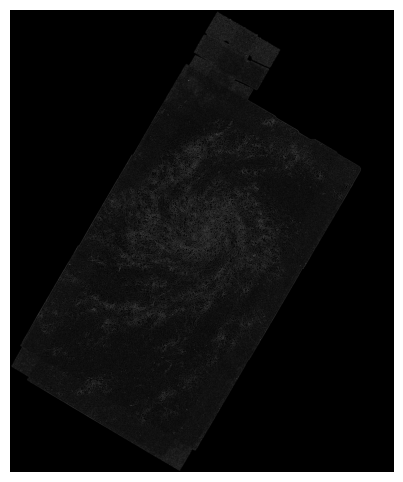

In [235]:
# Specify the path to your FITS file
fits_file = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\JWST_F770W_filamentenhanced_multiscale_examples (1)\Users\dthilker\python\Constrained-Diffusion-Decomposition-main\ngc4254_770_CDDss0016pc_arcsinh0p1_sato.fits'

# Load the FITS file data
hdul = fits.open(fits_file)
image_data = hdul[0].data  # Assuming the image data is in the primary HDU

# Set the desired figure size (width, height) in inches
fig_size = (6, 6)  # Adjust this to your desired size

# Create a figure with the specified size
plt.figure(figsize=fig_size)

cv2.imwrite(r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThresholdedImage.png', image_data)

# Display the image using Matplotlib without axes and colorbar
plt.imshow(image_data, cmap='gray')  # Adjust cmap if your data is not grayscale
print(np.shape(image_data))
plt.axis('off')  # Turn off axes

# Close the FITS file
hdul.close()

(262, 218)


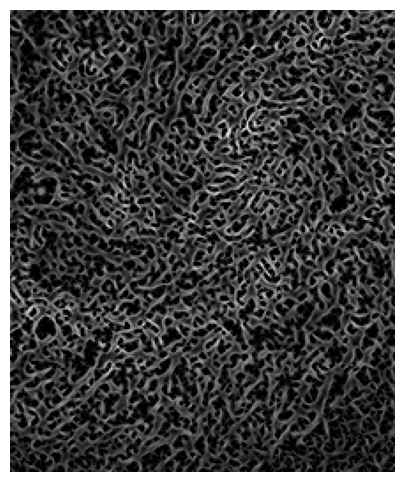

In [236]:
# Load the FITS file data
hdul = fits.open(fits_file)
image_data = hdul[0].data  # Assuming the image data is in the primary HDU

# Define the zoomed-in region
zoom_factor = 0.1  # Zoom factor (adjust as needed)
image_center_x, image_center_y = image_data.shape[1] // 2, image_data.shape[0] // 2  # Center of the image
zoom_width = int(image_data.shape[1] * zoom_factor)
zoom_height = int(image_data.shape[0] * zoom_factor)
x_start = image_center_x - zoom_width // 2
x_end = image_center_x + zoom_width // 2
y_start = image_center_y - zoom_height // 2
y_end = image_center_y + zoom_height // 2

# Display the zoomed-in image using Matplotlib without axes and colorbar

# Set the desired figure size (width, height) in inches
fig_size = (6, 6)  # Adjust this to your desired size

# Create a figure with the specified size
plt.figure(figsize=fig_size)

plt.imshow(image_data[y_start:y_end, x_start:x_end], cmap='gray')  # Adjust cmap if your data is not grayscale
print(np.shape(image_data[y_start:y_end, x_start:x_end]))
plt.axis('off')  # Turn off axes

# Save the zoomed-in image as PNG without any additional elements
save_path = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS'
os.makedirs(save_path, exist_ok=True)
save_file = os.path.join(save_path, 'HighZoomThresholdedImage.png')
plt.savefig(save_file, bbox_inches='tight', pad_inches=0)

# Close the FITS file
hdul.close()

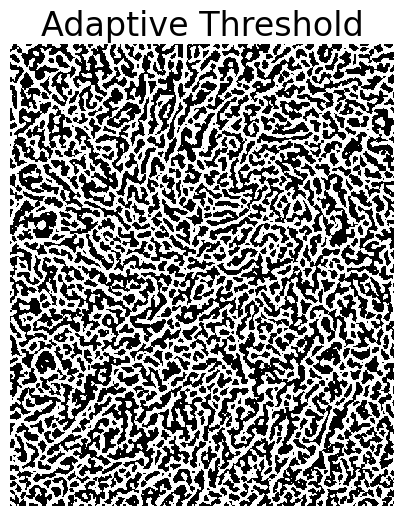

In [237]:

# Path to your image
image_path = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\HighZoomThresholdedImage.png'

#image_path = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThresholdedImage.png'

# Read the image using OpenCV
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale image

# Apply thresholding (assuming grayscale image)

#takes mean of 11x11 block and pixels above mean are thresholded pixels below mean are not
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2) 

# Set the desired figure size (width, height) in inches
fig_size = (6, 6)  # Adjust this to your desired size

# Create a figure with the specified size
plt.figure(figsize=fig_size)

cv2.imwrite(r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\thresholdwithintersects.png', th2)

# Display the thresholded image (optional)
plt.imshow(th2, cmap='gray')
plt.axis('off')  # Turn off axes
plt.title('Adaptive Threshold')
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3680105701.py:8: UserWarning: C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\skeletonized_image.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\skeletonized_image.png', skeleton)


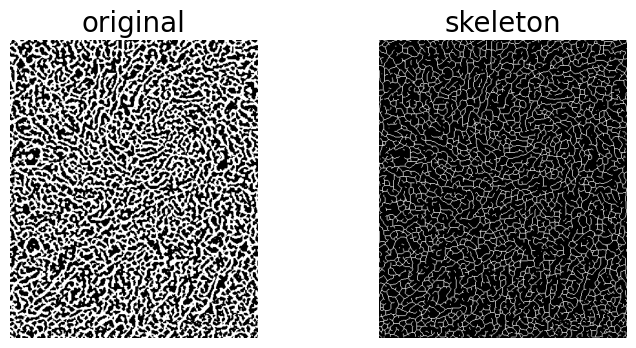

In [238]:
# Assuming th2 is the image to be skeletonized
image = th2

# Perform skeletonization
skeleton = skeletonize(image)

# Save the skeletonized image
io.imsave(r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\skeletonized_image.png', skeleton)

# Display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()


(384, 462)


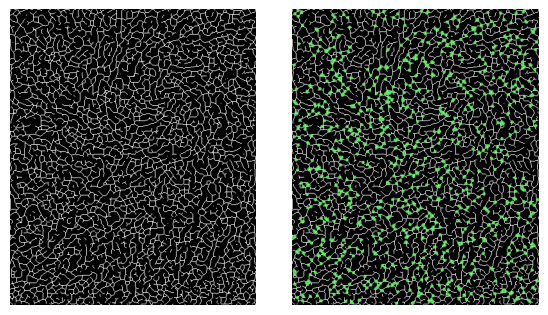

Processed C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\skeletonized_image.png successfully. Saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\thresholdintersectsremoved.png
(384, 462)


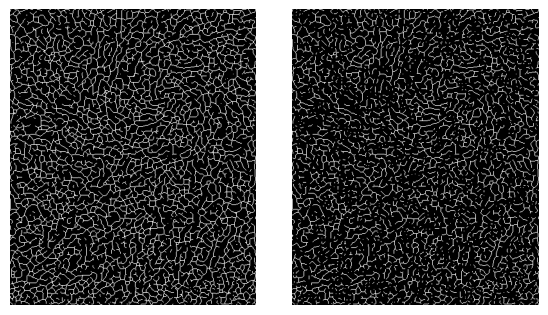

Processed C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\skeletonized_image.png successfully. Saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\thresholdintersectsremoved.png
(384, 462)


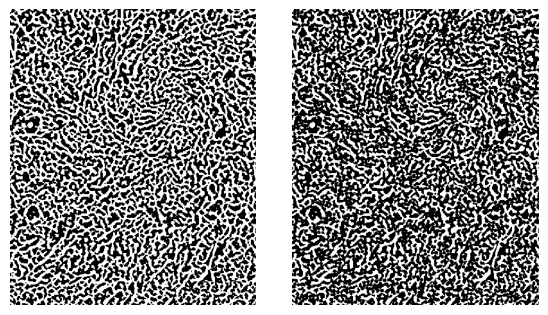

Processed C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\thresholdwithintersects.png successfully. Saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\thresholdintersectsremoved.png


In [239]:
importlib.reload(IA)
skeleton_image = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\skeletonized_image.png'

intersects_removed = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\thresholdintersectsremoved.png'

IA.identify_intersects(skeleton_image, intersects_removed,dot_size=2, box_size=31, perc = .31, RGBA_color = (100, 255, 100, 200), title = 'Processed Image with Intersects in green')
junctions = IA.identify_intersects(skeleton_image, intersects_removed, dot_size=2,box_size=31, perc = .31, RGBA_color = (0,0,0, 255), title = 'Processed Image with Intersects Removed')

thresholded_image = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\thresholdwithintersects.png'


IA.remove_junctions(junctions, thresholded_image, intersects_removed, dot_size = 2)

Thresholded image saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\InvertIntersects.png


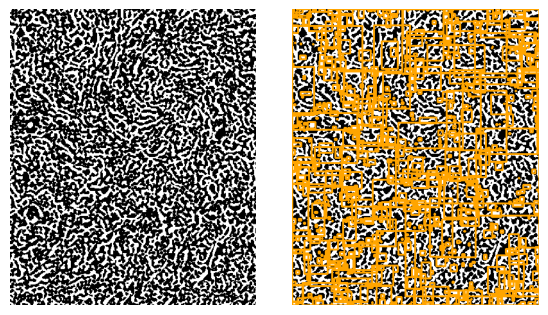

In [240]:
importlib.reload(IA)
invert_intersects_removed = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\InvertIntersects.png'
IMF.invert_image(intersects_removed ,invert_intersects_removed)
labels, stats, num_labels = IA.identify_connected_components(intersects_removed)

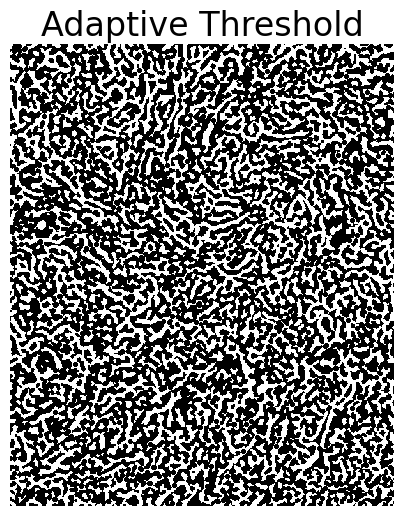

True

In [241]:
importlib.reload(IA)
small_areas = IA.sort_label_id(num_labels, stats, 5)
img = cv2.imread(intersects_removed, cv2.IMREAD_GRAYSCALE)  # Read as grayscale image

for label_id in small_areas:
    # Extract the bounding box coordinates
    left = stats[label_id, cv2.CC_STAT_LEFT]
    top = stats[label_id, cv2.CC_STAT_TOP]
    width = stats[label_id, cv2.CC_STAT_WIDTH]
    height = stats[label_id, cv2.CC_STAT_HEIGHT]
    for x in range(width):
        for y in range(height):
            img[top:top+height, left:left+width] = 0


# Set the desired figure size (width, height) in inches
fig_size = (6, 6)  # Adjust this to your desired size

# Create a figure with the specified size
plt.figure(figsize=fig_size)

# Display the thresholded image (optional)
plt.imshow(img, cmap='gray')
plt.axis('off')  # Turn off axes
plt.title('Adaptive Threshold')
plt.show()


cv2.imwrite(r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\SmallFilamentsGone.png', img)
    

Thresholded image saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\InvertIntersects.png


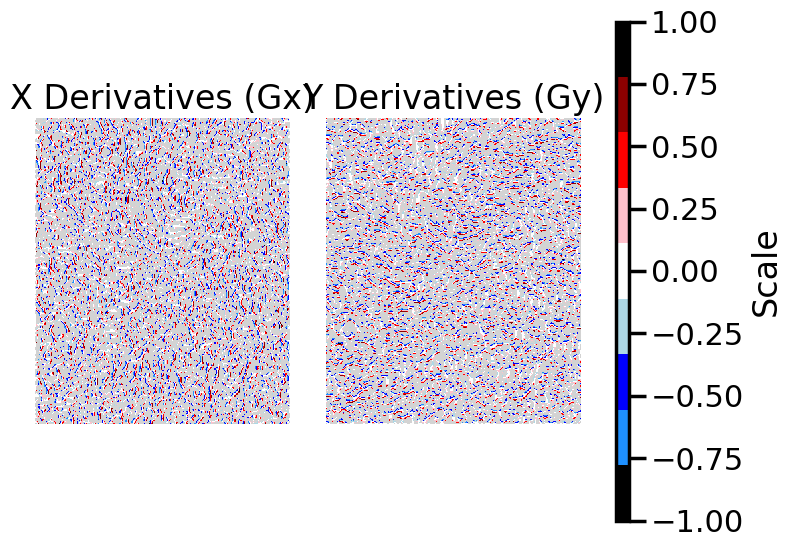

In [242]:
# read the image
importlib.reload(IA)
importlib.reload(PF)
# img = cv2.imread(intersects_removed)

# # convert to gray
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # blur
# blur = cv2.GaussianBlur(gray, (0,0), 1.3, 1.3)
# # apply sobel derivatives
# sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=3)
# sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=3)
# PF.plot_sobel_derivatives(sobelx, sobely)

filtered_input = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\SmallFilamentsGone.png'
#filtered_input = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\thresholdwithintersects.png'

IMF.invert_image(filtered_input , invert_intersects_removed)
sobel_x, sobel_y = IA.apply_sobel_filter_to_components(filtered_input, labels, stats, num_labels)

PF.plot_sobel_derivatives(filtered_input,sobel_x, sobel_y)



c:\Users\HP\Documents\JHU_Academics\Research\PHANGS\PHANGSDustFill\PlottingFuncs.py:101: RuntimeWarning: divide by zero encountered in divide
  angle_map = -1 * np.degrees(np.arctan(Gy / Gx))
c:\Users\HP\Documents\JHU_Academics\Research\PHANGS\PHANGSDustFill\PlottingFuncs.py:101: RuntimeWarning: invalid value encountered in divide
  angle_map = -1 * np.degrees(np.arctan(Gy / Gx))
c:\Users\HP\Documents\JHU_Academics\Research\PHANGS\PHANGSDustFill\PlottingFuncs.py:85: RuntimeWarning: invalid value encountered in scalar divide
  return np.degrees(np.arctan(sin_sum/cos_sum))


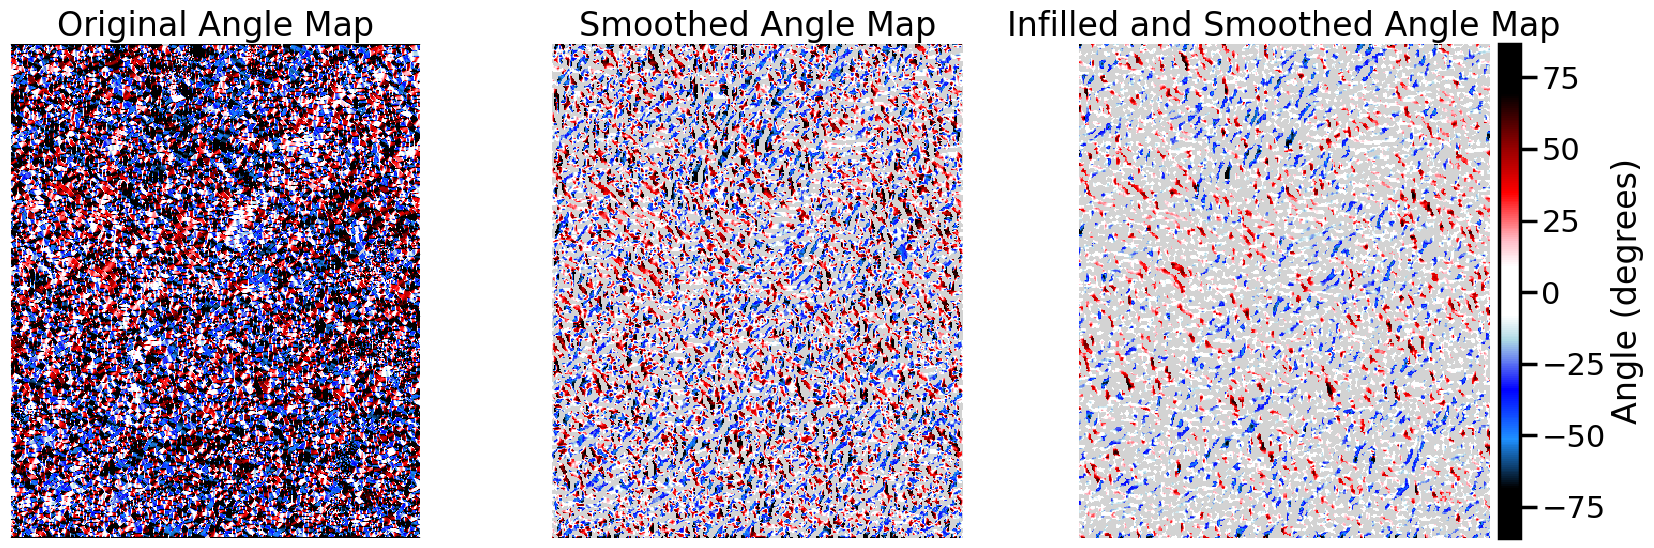

Smoothed angle map saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\smoothed_angles.png


In [243]:
importlib.reload(PF)
smoothed_angles = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\smoothed_angles.png'

mask_path = invert_intersects_removed

smoothed_angle_map, copy_angled_map = PF.plot_arctan_with_smoothing(sobel_y, sobel_x, filtered_input, 3, smoothed_angles)

In [244]:
importlib.reload(myGUI)
original_image_path = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\smoothed_angles.png'  
hexagon_size = 60
data_array = smoothed_angle_map  # Ensure this variable is passed correctly

original_image = Image.open(original_image_path).convert("RGBA")

hexagons, im_display = myGUI.update_image(hexagon_size, original_image)

param = {
    'hexagon_size': hexagon_size,
    'original_image': original_image,
    'hexagons': hexagons,
    'im_display': im_display,
    'im_display_base': im_display.copy(),
    'data_array': data_array,
    'hex_data': [],
    'hex_center': None  # Store the center of the hexagon
}

# Create window and set mouse callback
cv2.namedWindow('image')
cv2.setMouseCallback('image', myGUI.click_event, param)

# Create Tkinter window for buttons
root = tk.Tk()
root.title("Hexagon Size Adjuster")

increase_button = ttk.Button(root, text="+", command=lambda: myGUI.increase_hexagon_size(param))
increase_button.pack(side=tk.LEFT)

decrease_button = ttk.Button(root, text="-", command=lambda: myGUI.decrease_hexagon_size(param))
decrease_button.pack(side=tk.LEFT)

analyze_button = ttk.Button(root, text="Analyze Hexagon", command=lambda: myGUI.analyze_hexagon(param['hex_data'], param['hex_center']))
analyze_button.pack(side=tk.LEFT)

def on_closing():
    cv2.destroyAllWindows()
    root.destroy()

root.protocol("WM_DELETE_WINDOW", on_closing)
root.mainloop()
